**Maximizing Revenue for Taxi Cab Drivers through Payment Type Analyis**

**Problem Statement**

In the fast-paced taxi booking sector making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximize revenue streams for taxi drivers in order to meet the needs. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationships between payment type and fare amount.

**Objective**

This project's main objective is to run A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and discriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus who pay with cash.

**Research Question**

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience? 

**Importing Libraries**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [3]:
df = pd.read_csv('yellow_tripdata_2016-01.csv')

In [5]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


**Explanatory Data Analysis**

In [7]:
df.shape

(10906858, 19)

In [9]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [9]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [11]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.00
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.00
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.00
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.00
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.00
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3,18.50
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3,26.75
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,11.90
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3,11.20
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,11.10


In [13]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [15]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,2,2,7.5,1.10,0.000000
1,5,1,18.0,4.90,0.000000
2,1,1,33.0,10.54,0.000000
3,1,2,16.5,4.75,0.000000
4,3,2,8.0,1.76,0.000000
...,...,...,...,...,...
10906853,1,2,8.5,2.20,7.766667
10906854,1,2,2.5,0.00,0.183333
10906855,3,2,7.5,1.40,107433.066667
10906856,1,1,11.5,2.10,119912.700000


In [19]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [17]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
695,1,1,7.0,0.90,8.183333
932,1,1,5.0,0.80,4.633333
1087,2,1,8.5,1.30,10.416667
1104,1,2,5.5,0.60,6.333333
1147,1,1,7.0,1.10,7.700000
...,...,...,...,...,...
10906850,1,1,9.5,2.50,8.383333
10906851,1,1,7.0,1.68,6.616667
10906852,1,1,11.0,2.65,11.950000
10906853,1,2,8.5,2.20,7.766667


In [19]:
df.drop_duplicates(inplace = True)

In [21]:
df.shape

(4494269, 5)

In [23]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.536996
2    0.188114
5    0.099397
3    0.070762
6    0.066226
4    0.038377
0    0.000112
8    0.000006
9    0.000005
7    0.000005
Name: proportion, dtype: float64

In [25]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.296103e-01
2    3.616960e-01
3    6.066615e-03
4    2.626901e-03
5    2.225056e-07
Name: proportion, dtype: float64

In [27]:
df = df[df['payment_type'] < 3] 
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [29]:
df.shape

(4157187, 5)

In [61]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,2,Cash,7.5,1.10,0.000000
1,5,Card,18.0,4.90,0.000000
2,1,Card,33.0,10.54,0.000000
3,1,Cash,16.5,4.75,0.000000
4,3,Cash,8.0,1.76,0.000000
...,...,...,...,...,...
10906848,1,Card,11.5,2.84,11.283333
10906849,1,Card,29.0,7.83,32.983333
10906855,3,Cash,7.5,1.40,107433.066667
10906856,1,Card,11.5,2.10,119912.700000


In [37]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,4.157187e+06,4.157187e+06,4.157187e+06,4.157187e+06
mean,1.907509e+00,1.856616e+01,9.046807e+00,2.433622e+01
std,1.331174e+00,5.663129e+01,4.777362e+03,1.367636e+02
min,1.000000e+00,-2.340000e+02,0.000000e+00,-4.395000e+01
25%,1.000000e+00,9.500000e+00,1.670000e+00,1.051667e+01
50%,1.000000e+00,1.400000e+01,3.090000e+00,1.666667e+01
75%,2.000000e+00,2.300000e+01,6.170000e+00,2.480000e+01
max,5.000000e+00,1.112709e+05,8.000010e+06,1.199127e+05


In [79]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]


In [81]:
for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [82]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
5,2,Cash,19.0,5.52,18.500000
6,2,Cash,26.0,7.45,26.750000
7,1,Cash,9.0,1.20,11.900000
8,1,Cash,18.0,6.00,11.200000
9,1,Cash,11.5,3.21,11.100000
...,...,...,...,...,...
10906837,1,Card,18.0,5.55,13.750000
10906842,1,Cash,12.5,2.73,15.100000
10906844,1,Card,16.5,4.74,16.583333
10906848,1,Card,11.5,2.84,11.283333


**Data Visualization**

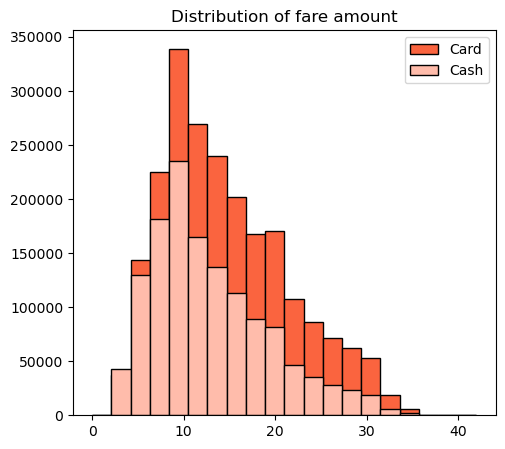

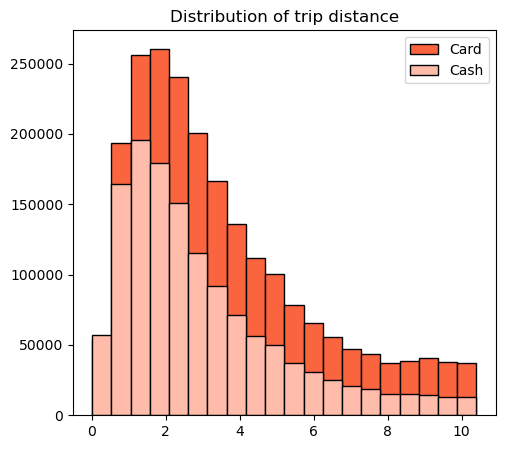

In [85]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked', bins=20, edgecolor='k',color='#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20, edgecolor='k',color='#FFBCAB', label='Cash')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked', bins=20, edgecolor='k',color='#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20, edgecolor='k',color='#FFBCAB', label='Cash')
plt.legend()
plt.show()

In [47]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           14.706223  6.913216      3.540020  2.457726
Cash           12.959009  6.450672      2.979816  2.231204

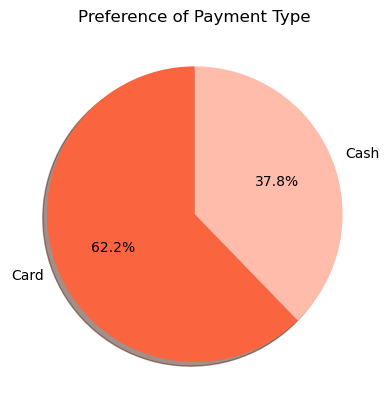

In [49]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,startangle = 90, shadow= True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

In [51]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace = True )
passenger_count.reset_index(inplace = True)

In [53]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [55]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,1215191,34.352631
1,Card,2,454596,12.851123
2,Card,3,178374,5.042513
3,Card,4,93142,2.633062
4,Card,5,260690,7.369531
5,Cash,1,737931,20.860812
6,Cash,2,276669,7.821246
7,Cash,3,110254,3.116806
8,Cash,4,64331,1.818594
9,Cash,5,146225,4.133682


In [65]:
df1= pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df1['payment_type'] = ['Card','Cash']
df1.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df1.iloc[1,1:]=passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Card,34.352631,12.851123,5.042513,2.633062,7.369531
1,Cash,20.860812,7.821246,3.116806,1.818594,4.133682


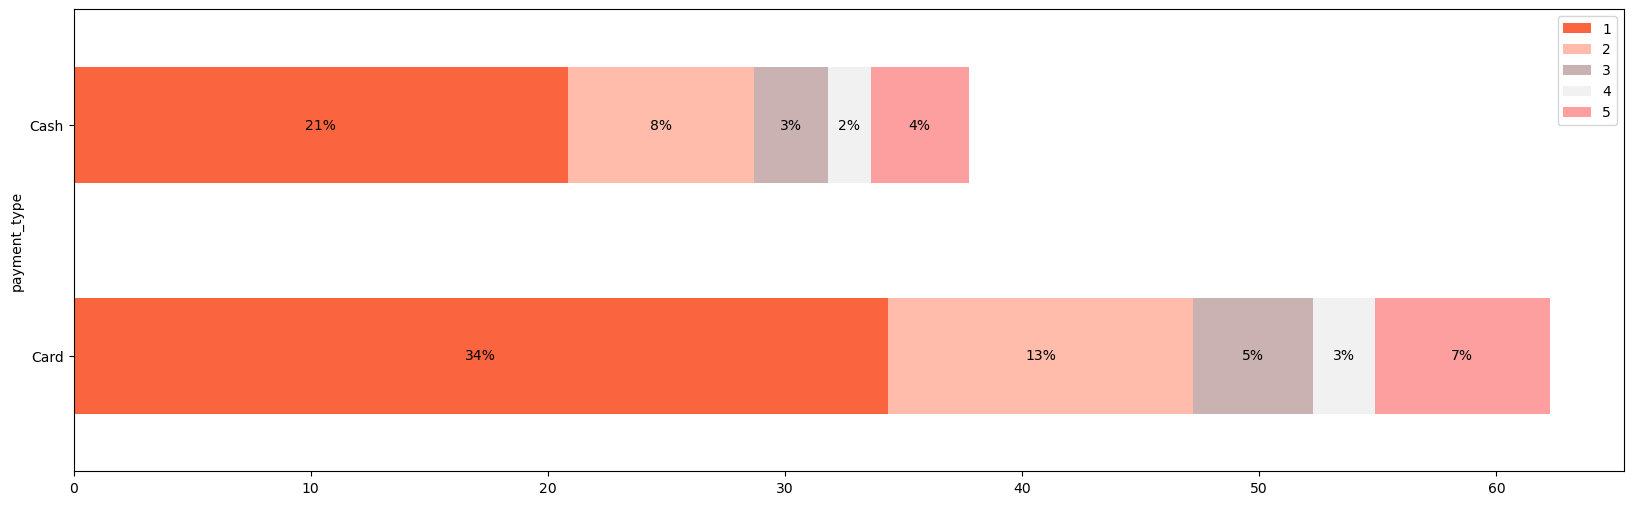

In [67]:
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'],
    ax=ax
)

# Adding percentage text inside bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if width > 0:  # only label visible bars
        ax.text(
            x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            ha='center',
            va='center',
            fontsize=10,
            color='black'
        )

plt.show()


**Hypothesis Testing**

**Null hypothesis**: There is no difference in the average fare between customers who use credit cards and customers who use cash. 
**Alternative hypothesis**: There is a difference in the average fare between customers who use credit cards and customers who use cash.

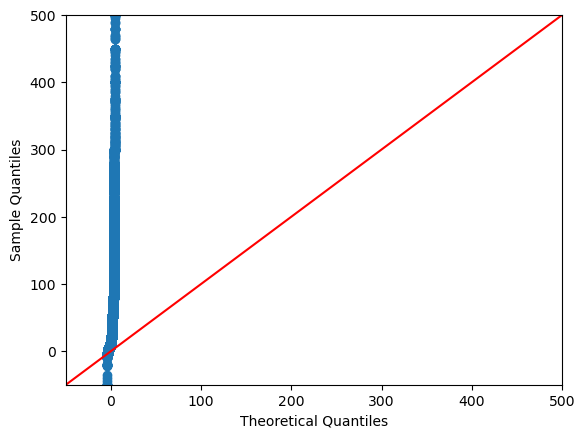

In [31]:
sm.qqplot(df['fare_amount'], line='45')
plt.xlim(-50, 500)   
plt.ylim(-50, 500)
plt.show()

In [43]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [67]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [69]:
t_stats, p_value = st.ttest_ind(a = card_sample, b= cash_sample, equal_var = False)
print('T statistic',t_stats,'P value',p_value)

T statistic 39.943356231686444 P value 0.0


With a T-statistic of 39.95 and a P-value of 0.00, we will reject the Null Hypothesis, suggesting there is a indeed a significance difference in average fare between the two payment methods.

**Recommendations**

Encourage customers to pay with credit cards to captalize on the potential for generating more revenue for taxi cab drivers.
Implement stratigies such as offering incentives or discounts for credit card transactions ro incentivize customers to choose this payment method.
Provide seamless and secure credit card payment options to enhance customer convenience and encourage adoption of this preferred payment method.

**Conclusion**

This analysis demonstrates how statistical inference can illuminate patterns in everyday transactional data.
By applying data analytics to the taxi sector, we uncover actionable insights that empower drivers and service providers to make evidence-based financial decisions — ultimately enhancing both profitability and customer satisfaction.